In [1]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import networkx as nx
import powerlaw

In [3]:
df = pd.read_excel("/content/wieghted-connections.xlsx")
df.head()

,Unnamed: 0,First City,Second City,link
0,0,Nad Ali district,Nad Ali district,0
1,1,Nad Ali district,Marja,1
2,2,Nad Ali district,Tangi,0
3,3,Nad Ali district,Zurmat,0
4,4,Nad Ali district,Jalalabad,1


In [4]:
df = df[df.link == 1]

In [5]:
df.head()

,Unnamed: 0,First City,Second City,link
1,1,Nad Ali district,Marja,1
4,4,Nad Ali district,Jalalabad,1
8,8,Nad Ali district,Golbahar,1
9,9,Nad Ali district,Kodalay,1
10,10,Nad Ali district,Khoshamand,1


In [6]:
G = nx.from_pandas_edgelist(df, "First City", "Second City", create_using=nx.Graph())

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CCDF FOR TERRORIST GRAPH')

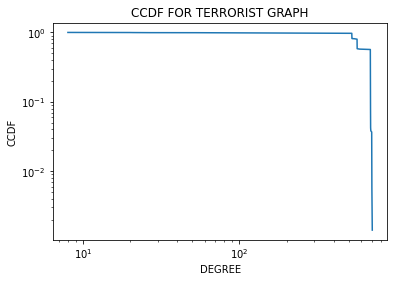

In [8]:
Gdeg = [G.degree(n) for n in G.nodes]
powerlaw.plot_ccdf(Gdeg)
plt.xlabel("DEGREE")
plt.ylabel("CCDF")
plt.title("CCDF FOR TERRORIST GRAPH")

<AxesSubplot:>

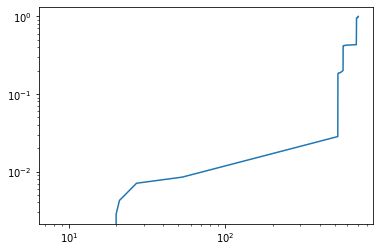

In [9]:
powerlaw.plot_cdf(Gdeg)

<AxesSubplot:>

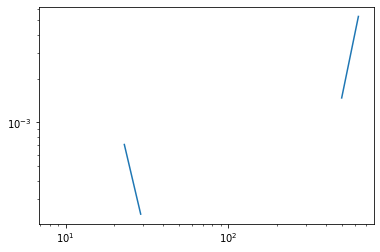

In [10]:
powerlaw.plot_pdf(Gdeg)

In [11]:
fit = powerlaw.Fit(Gdeg)

Calculating best minimal value for power law fit


Text(0, 0.5, 'No. of Nodes')

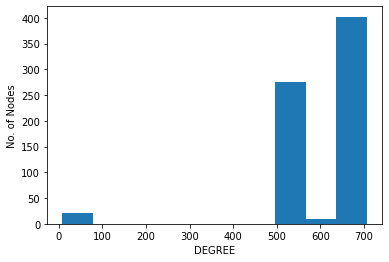

In [16]:

degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
  
plt.xlabel("DEGREE")
plt.ylabel("No. of Nodes")

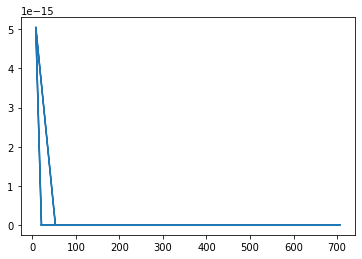

In [13]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt



plt.plot(Gdeg, norm.pdf(Gdeg))

plt.show()